# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

In [17]:
cities

['busselton',
 'barentsburg',
 'naron',
 'jinchengjiang',
 'nakhon phanom',
 'saint-philippe',
 'taolanaro',
 'butaritari',
 'delta del tigre',
 'am timan',
 'attawapiskat',
 'quatre cocos',
 'rikitea',
 'pisco',
 'nizhniy tsasuchey',
 'kenai',
 'barrow',
 'chuy',
 'qaanaaq',
 'sao jose da coroa grande',
 'richards bay',
 'onda',
 'pevek',
 'holetown',
 'albany',
 'ivdel',
 'ushuaia',
 'georgetown',
 'cap malheureux',
 'katsuura',
 'coquimbo',
 'gat',
 'auki',
 'cabo san lucas',
 'arlit',
 'nanortalik',
 'bowmore',
 'airai',
 'laguna',
 'gomel',
 'vila franca do campo',
 'port elizabeth',
 'vaini',
 'bredasdorp',
 'mto wa mbu',
 'san vicente',
 'saint george',
 'tuatapere',
 'shenkursk',
 'atuona',
 'tretten',
 'lavrentiya',
 'mahebourg',
 'mutis',
 'belushya guba',
 'mataura',
 'grindavik',
 'dembi dolo',
 'bangassou',
 'nantucket',
 'ulladulla',
 'kapaa',
 'saskylakh',
 'puerto ayora',
 'punta arenas',
 'tuktoyaktuk',
 'porto novo',
 'youkounkoun',
 'thompson',
 'port lincoln',
 'her

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
#Build API Calls
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

cit = []
clo = []
cou = []
dat = []
hum = []
lat = []
lng = []
mxt = []
win = []


for city in cities:
    #print(f"{url}&q={city}")
    response = requests.get(f"{url}&q={city}")
    #print(response)
    response = response.json()
    try:
        cit.append(response["name"])
        clo.append(response["clouds"]["all"])
        cou.append(response["sys"]["country"])
        dat.append(response["dt"])
        hum.append(response["main"]["humidity"])
        lng.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        mxt.append(response["main"]["temp_max"])
        win.append(response["wind"]["speed"])        
    except:
        continue









In [56]:
len(cit)

In [57]:
len(clo)

DatetimeIndex(['1970-01-01 00:00:01.603784623',
               '1970-01-01 00:00:01.603784742',
               '1970-01-01 00:00:01.603784742',
               '1970-01-01 00:00:01.603784742',
               '1970-01-01 00:00:01.603784743',
               '1970-01-01 00:00:01.603784743',
               '1970-01-01 00:00:01.603784743',
               '1970-01-01 00:00:01.603785025',
               '1970-01-01 00:00:01.603784744',
               '1970-01-01 00:00:01.603784661',
               ...
               '1970-01-01 00:00:01.603784708',
               '1970-01-01 00:00:01.603784867',
               '1970-01-01 00:00:01.603784645',
               '1970-01-01 00:00:01.603784867',
               '1970-01-01 00:00:01.603784868',
               '1970-01-01 00:00:01.603784868',
               '1970-01-01 00:00:01.603784868',
               '1970-01-01 00:00:01.603784868',
               '1970-01-01 00:00:01.603784869',
               '1970-01-01 00:00:01.603784869'],
              dtype=

In [67]:
#Create data frame
city_df = pd.DataFrame()
city_df['City'] = cit
city_df['Cloudiness'] = clo
city_df['Country'] = cou
city_df['Date'] = dat
city_df['Humidity'] = hum
city_df['Latitude'] = lat
city_df['Longitude'] = lng
city_df['Max Temp'] = mxt
city_df['Wind Speed'] = win

In [68]:
#display data frame
city_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Busselton,100,AU,1603804086,67,-33.65,115.33,18.33,4.28
1,Narón,20,ES,1603803573,82,43.52,-8.15,17.00,11.80
2,Nakhon Phanom,40,TH,1603803574,94,17.33,104.42,26.00,0.50
3,Saint-Philippe,75,RE,1603803574,61,-21.36,55.77,27.00,4.10
4,Butaritari,100,KI,1603803574,68,3.07,172.79,27.28,3.72
...,...,...,...,...,...,...,...,...,...
533,Chumikan,100,RU,1603803724,77,54.72,135.31,3.31,6.07
534,Ixtapa,5,MX,1603803974,94,20.70,-105.20,25.56,1.43
535,Waddān,0,LY,1603803975,15,29.16,16.14,32.53,7.69
536,Taixing,91,CN,1603803724,80,32.17,120.01,18.33,3.38


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
#send data frame to CSV file
city_df.to_csv("cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

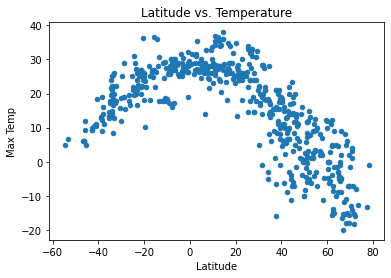

In [135]:
fig = city_df.plot(kind = "scatter", x = "Latitude", y = "Max Temp", title = "Latitude vs. Temperature")
plt.savefig("Latitute vs. Temperature.png")
#There is a correlation between latitude and temperature moving from the equator up and down show a similar temperature pattern
#

#### Latitude vs. Humidity Plot

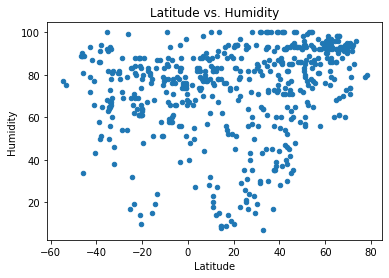

In [136]:
city_df.plot(kind = "scatter", x = "Latitude", y = "Humidity", title = "Latitude vs. Humidity")
plt.savefig("Latitute vs. Humidity.png")
#there doesn't seem to be a correlation between humidity and latitude as there are both places with high and low humidity in my sample regardless of the latitude

#### Latitude vs. Cloudiness Plot

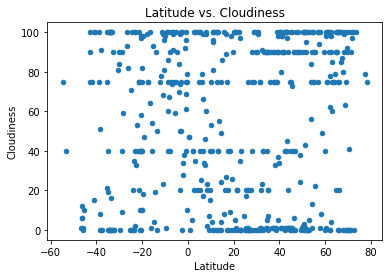

In [137]:
city_df.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", title = "Latitude vs. Cloudiness")
plt.savefig("Latitute vs. Cloudiness.png")
#I didn't expect this "band" behavior, it seems as if you have cloudiness bands at different intervals regardless of the Latitude

#### Latitude vs. Wind Speed Plot

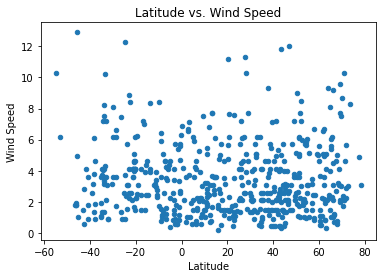

In [138]:
city_df.plot(kind = "scatter", x = "Latitude", y = "Wind Speed", title = "Latitude vs. Wind Speed")
plt.savefig("Latitute vs. Wind Speed.png")
#Wind speed seems to be fairly constant regardless of latitude

## Linear Regression

In [139]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg(x,y,title,x_axis,y_axis,coords):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values = x*slope+intercept
    annote =f'y={round(slope,2)}*x + {round(intercept,2)}'
    plt.plot(x,regress_values, color = "red")
    plt.grid()
    plt.title(title)
    plt.scatter(x,y)
    plt.annotate(annote, coords, color = "red", fontsize = 12)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()
    return round(pvalue,2)
#Testing function
#lin_reg(north_df["Latitude"], north_df["Max Temp"], "Title", "Latitude", "Max Temperature", (0,-20))

In [71]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[city_df["Latitude"] > 0]
south_df = city_df.loc[city_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

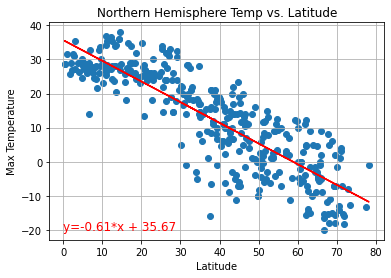

0.0

In [96]:
lin_reg(north_df["Latitude"], north_df["Max Temp"], "Northern Hemisphere Temp vs. Latitude", "Latitude", "Max Temperature", (0,-20))
#There is a clear correlation between latitude and temperature in the norther hemisphere


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

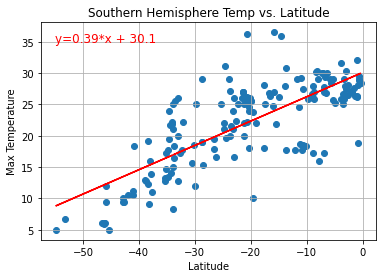

0.0

In [90]:
lin_reg(south_df["Latitude"], south_df["Max Temp"], "Southern Hemisphere Temp vs. Latitude", "Latitude", "Max Temperature", (-55,35))
#Same, clear correlation between temperature and latitude in the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

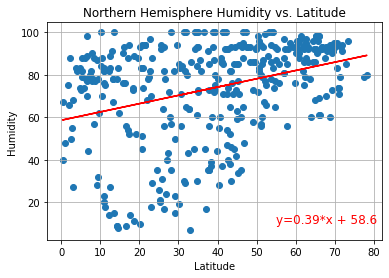

0.0

In [101]:
lin_reg(north_df["Latitude"], north_df["Humidity"], "Northern Hemisphere Humidity vs. Latitude", "Latitude", "Humidity", (55,10))
#There seems to be a pattern, but not a clear correlation

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

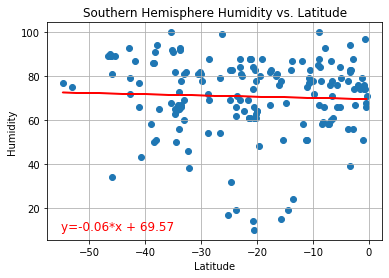

0.58

In [111]:
lin_reg(south_df["Latitude"], south_df["Humidity"], "Southern Hemisphere Humidity vs. Latitude", "Latitude", "Humidity", (-55,10))
#There seems to be a pattern, but not a clear correlation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

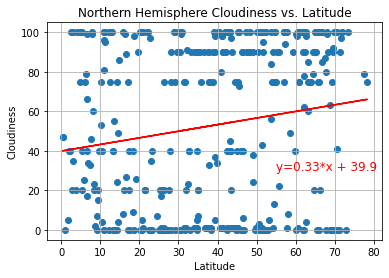

0.0

In [114]:
lin_reg(north_df["Latitude"], north_df["Cloudiness"], "Northern Hemisphere Cloudiness vs. Latitude", "Latitude", "Cloudiness", (55,30))
#can't find correlation or don't understand it!

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

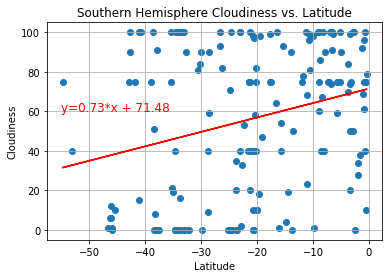

0.0

In [117]:
lin_reg(south_df["Latitude"], south_df["Cloudiness"], "Southern Hemisphere Cloudiness vs. Latitude", "Latitude", "Cloudiness", (-55,60))
#can't find correlation or don't understand it!

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

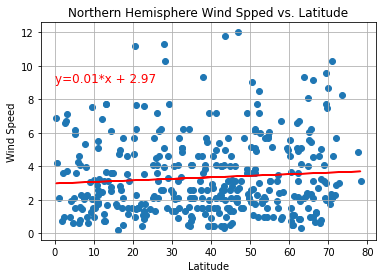

0.12

In [120]:
lin_reg(north_df["Latitude"], north_df["Wind Speed"], "Northern Hemisphere Wind Spped vs. Latitude", "Latitude", "Wind Speed", (0,9))
#Same as in the previous graphs

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

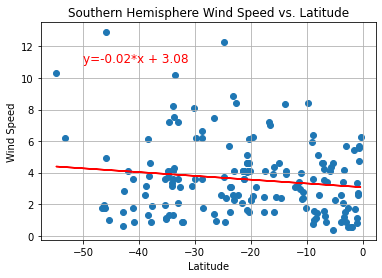

0.06

In [122]:
lin_reg(south_df["Latitude"], south_df["Wind Speed"], "Southern Hemisphere Wind Speed vs. Latitude", "Latitude", "Wind Speed", (-50,11))
